#### Determine the max information gain of entropy 

In [11]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# read data

data = pd.read_csv("/Users/xing-huanggao/Desktop/bugs.csv", header = 0)


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
Species        24 non-null object
Color          24 non-null object
Length (mm)    24 non-null float64
dtypes: float64(1), object(2)
memory usage: 704.0+ bytes


In [3]:
data.columns

Index(['Species', 'Color', 'Length (mm)'], dtype='object')

In [4]:
data.describe()

Length (mm)
count    24.000000
mean     18.070833
std       3.584323
min      11.600000
25%      14.975000
50%      18.300000
75%      20.625000
max      24.800000

In [5]:
data.Species.value_counts()

Lobug    14
Mobug    10
Name: Species, dtype: int64

In [6]:
data.Color.value_counts()

Blue     10
Green     8
Brown     6
Name: Color, dtype: int64

In [7]:
sum(data["Length (mm)"]<20)

17

In [46]:
# count # of mobug and lobug
data[data["Length (mm)"] <17]

Species  Color  Length (mm)
0    Mobug  Brown         11.6
1    Mobug   Blue         16.3
2    Lobug   Blue         15.1
6    Mobug  Brown         15.7
12   Mobug  Brown         13.8
13   Lobug   Blue         14.5
19   Mobug   Blue         14.6
21   Lobug  Brown         14.1
23   Mobug   Blue         13.1

In [44]:
data[data["Length (mm)"] >17].Species.value_counts()

Lobug    11
Mobug     4
Name: Species, dtype: int64

In [48]:
data[data["Length (mm)"] <17].Species.value_counts()

Mobug    6
Lobug    3
Name: Species, dtype: int64

In [85]:
a = -(3/9*np.log2(3/9) + 6/9 * np.log2(6/9))
b = -(11/15 * np.log2(11/15) + 4/15*np.log2(4/15))

In [89]:
a*9/24 + b *15/24

0.867261401483663

In [90]:
S_parent - (a*9/24 + b *15/24)

0.11260735516748976

In [52]:
def two_group_ent(first, tot):                        
    return -(first/tot*np.log2(first/tot) +           
             (tot-first)/tot*np.log2((tot-first)/tot))
tot_ent = two_group_ent(10, 24)
tot_ent

0.9798687566511528

In [83]:
two_group_ent(11,15)

0.8366407419411672

In [81]:
g17_ent = 15/24*two_group_ent(11,15) + 9/24*two_group_ent(6,9)

g17_ent

0.867261401483663

In [9]:
data[data["Length (mm)"] <20].Species.value_counts()

Mobug    9
Lobug    8
Name: Species, dtype: int64

In [45]:
data[data["Length (mm)"] >20].Species.value_counts()

Lobug    6
Mobug    1
Name: Species, dtype: int64

In [10]:
data[data["Species"] == "Lobug"].Color.value_counts()

Blue     6
Green    6
Brown    2
Name: Color, dtype: int64

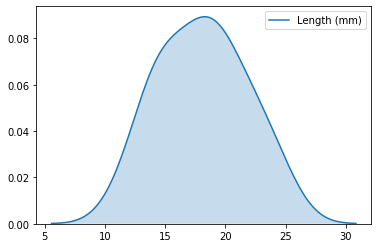

In [16]:
import seaborn as sb
sb.kdeplot(data['Length (mm)'], shade = True);

#### How to calculate information gain (entropy)? - how do we quantify the quality of data split?

#### Formule of information gain
Entropy (_parent_) - m/(m+n)*entropy(child1)- n/(m+n)entropy(child2...)



#### Calculate parent entropy
- two types of species (Mobug vs. Lobug)
- Mobug=10 and Lobug =14
- entropy = -(p1log2p1+p2log2p2) while p1 = m/m+n
let's m = Mobug and n = Lobug
p1 = 10/(10+14)
p2 = 14/(10+14)

In [19]:
# entropy parent
p1 = 10/(10+14)
p2 = 14/(10+14)
S_parent = -(p1*np.log2(p1)+p2*np.log2(p2))
print(S_parent)

0.9798687566511528


In [23]:
# determine how many lobugs and mobugs if we split them based on their colors
print(data[data['Color']=='Brown'].Species.value_counts())
print(data[data['Color'] == 'Green'].Species.value_counts())
print(data[data['Color'] == 'Blue'].Species.value_counts())

Mobug    4
Lobug    2
Name: Species, dtype: int64
Lobug    6
Mobug    2
Name: Species, dtype: int64
Lobug    6
Mobug    4
Name: Species, dtype: int64


In [114]:
# entrop of brown child

def two_ent(first, tot):
    return -(first/tot*np.log2(first/tot) + 
             (tot-first)/tot * np.log2((tot - first)/tot))

S_brown = two_ent(4,6)
S_green = two_ent(6,8)
S_blue = two_ent(6, 10)

In [115]:
print(S_brown, S_green, S_blue)

0.9182958340544896 0.8112781244591328 0.9709505944546686


In [116]:
# gain entropy based on color split
print(S_parent - S_brown)
print(S_parent - S_green)
print(S_parent - S_blue)

0.06157292259666325
0.16859063219201997
0.008918162196484225
